<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Тема 2. Визуальный анализ данных с Python
## <center>Часть 1. Обзор библиотеки Seaborn

**Seaborn** – дополнение Matplotlib с API как для быстрого построения красивых графиков, так и для детальной кастомизации картинок для презентации.

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

**Посмотрим на Seaborn сразу в действии на данных по моделям месяца по версии журнала Playboy.**

In [9]:
girls = pd.read_csv('girls.csv')
girls.head(10)

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48
5,August,1956,94,61,91,170,55
6,October,1956,91,61,91,166,52
7,November,1956,99,56,91,160,58
8,December,1956,89,58,89,157,48
9,January,1957,91,64,91,165,54


In [10]:
girls.describe(include='all')

,Month,Year,Bust,Waist,Hips,Height,Weight
count,604,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN
top,December,NaN,NaN,NaN,NaN,NaN,NaN
freq,54,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1983.057947,89.293046,59.529801,87.942053,167.887417,52.168874
std,NaN,14.843740,3.994011,3.616909,3.479142,5.776711,4.040585
min,NaN,1953.000000,81.000000,46.000000,61.000000,150.000000,42.000000
25%,NaN,1970.000000,86.000000,58.000000,86.000000,165.000000,49.000000
50%,NaN,1983.000000,89.000000,61.000000,89.000000,168.000000,52.000000
75%,NaN,1996.000000,91.000000,61.000000,91.000000,173.000000,54.000000


**Гистограммы. Метод <a href="https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html">distplot</a>**

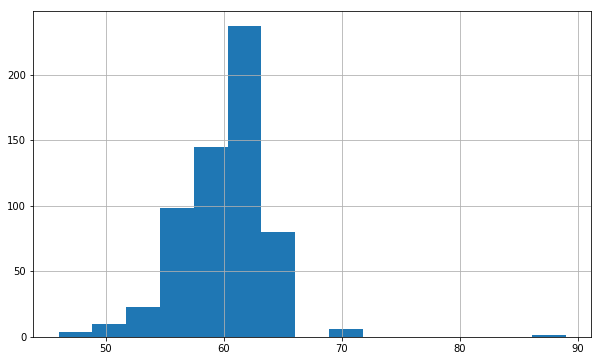

In [17]:
girls['Waist'].hist(bins=15);

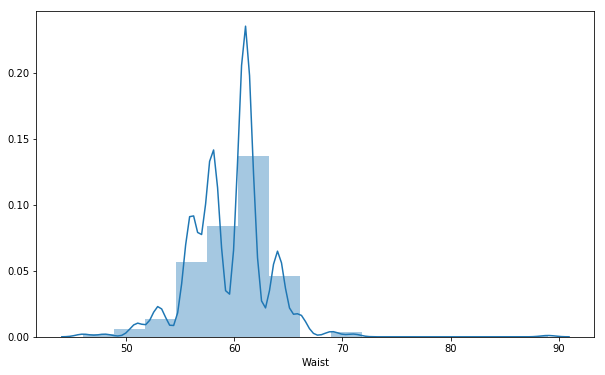

In [23]:
sns.distplot(girls['Waist'], bins=15, kde=True);

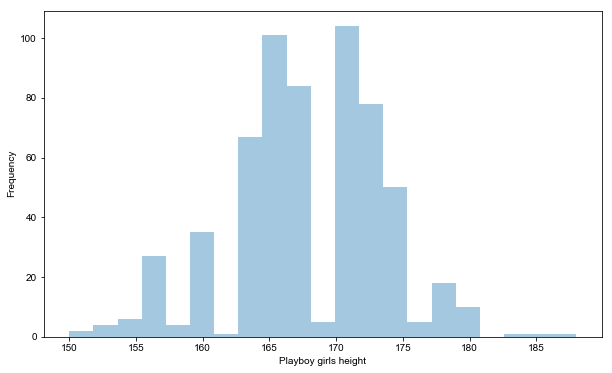

In [24]:
ax = sns.distplot(girls['Height'], kde=False)
ax.set(xlabel='Playboy girls height', ylabel='Frequency')
sns.set_style('darkgrid')

**Метод <a href="https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html">boxplot</a>**
В наборе данных все признаки численные, так что создадим категорию "weight_cat" из 3 типов веса.

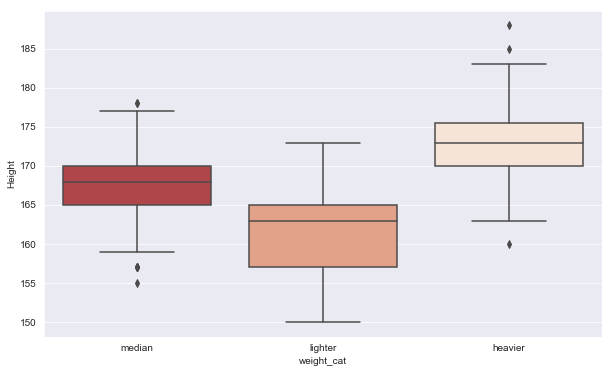

In [39]:
def weight_category(weight):
    return 'heavier' if weight > 54\
            else 'lighter' if weight < 49 else 'median'

girls['weight_cat'] = girls['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=girls);

**Метод <a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html">pairplot</a>**

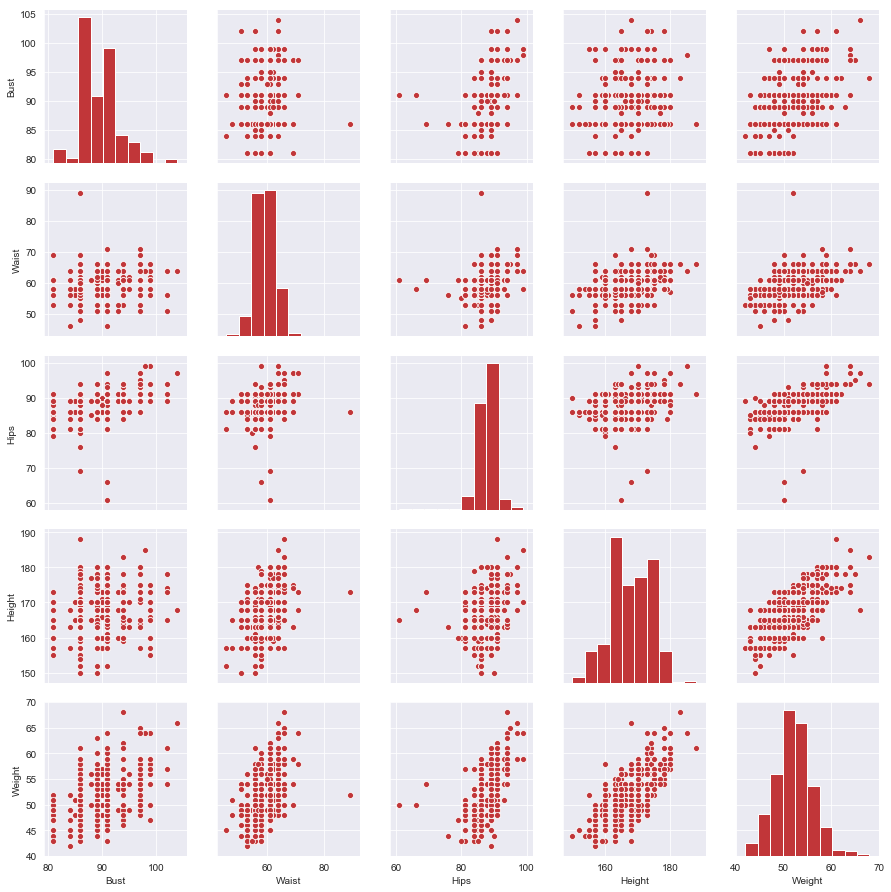

In [29]:
sns.set_palette(sns.color_palette("RdBu"))
sns.pairplot(girls[['Bust', 'Waist', 'Hips', 'Height', 'Weight']])

In [30]:
girls.corr()

,Year,Bust,Waist,Hips,Height,Weight
Year,1.000000,-0.461384,0.314772,-0.310939,0.306172,-0.005168
Bust,-0.461384,1.000000,0.062017,0.455448,0.090848,0.408590
Waist,0.314772,0.062017,1.000000,0.287631,0.374636,0.468535
Hips,-0.310939,0.455448,0.287631,1.000000,0.231788,0.549841
Height,0.306172,0.090848,0.374636,0.231788,1.000000,0.709458
Weight,-0.005168,0.408590,0.468535,0.549841,0.709458,1.000000


In [31]:
girls.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


**Метод <a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.countplot.html">countplot</a>**

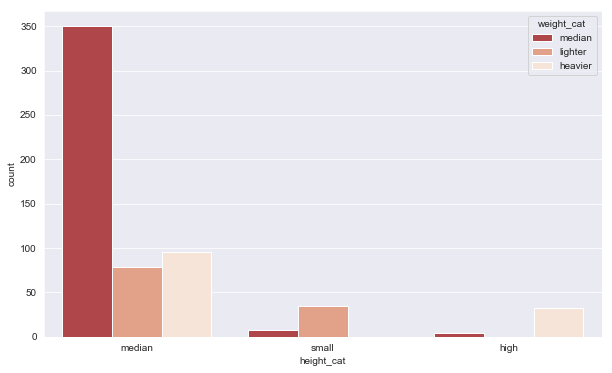

In [45]:
def height_category(height):
    return 'high' if height > 175\
            else 'small' if height < 160 else 'median'

girls['height_cat'] = girls['Height'].apply(height_category)
sns.countplot(x='height_cat', hue='weight_cat', data=girls);

In [44]:
pd.crosstab(girls['weight_cat'], girls['height_cat'])

height_cat,high,median,small
weight_cat,,,
heavier,32,96,0
lighter,0,79,35
median,4,350,8


**Метод [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html)**

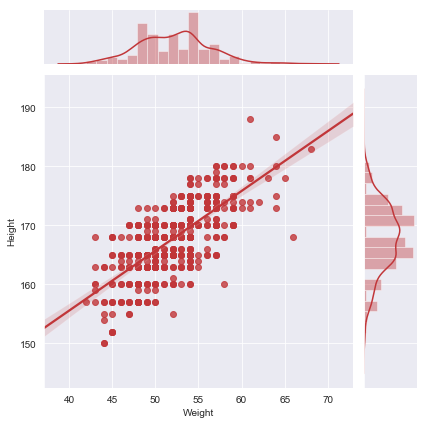

In [41]:
sns.jointplot(x='Weight', y='Height', 
              data=girls, kind='reg');

## Пример визуального анализа данных с Pandas и Seaborn 

В 1968 году была [опубликована](http://www.ncbi.nlm.nih.gov/pubmed/5676802) статья под названием "Correlation of Performance Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in Human Subjects".

К статье приложен небольшой набор данных всего из 7 наблюдений.

In [14]:
data_types = {'Drugs': float,
              'Score': float}
df = pd.read_csv('../../data/drugs-and-math.csv', 
                 index_col=0, sep=',', dtype=data_types)

In [15]:
print(df.shape)
print(df.columns)
print(df.index)

(7, 2)
Index(['Drugs', 'Score'], dtype='object')
Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


In [16]:
df

,Drugs,Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


**Таблица уже отсортирована по колонке Drugs, сделаем сортировку по Score.**

In [17]:
df.sort_values('Score', 
               ascending=False, 
               inplace=True)

In [18]:
df.describe().T # Иногда так лучше

,count,mean,std,min,25%,50%,75%,max
Drugs,7.0,4.332857,1.935413,1.17,3.115,4.69,5.915,6.41
Score,7.0,50.087143,18.610854,29.97,35.195,45.65,62.835,78.93


### Рисунки

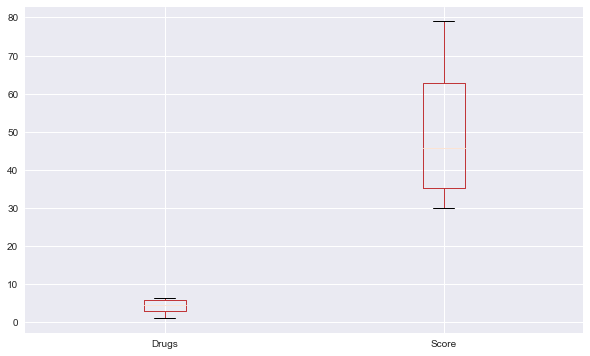

In [19]:
df.plot(kind='box');

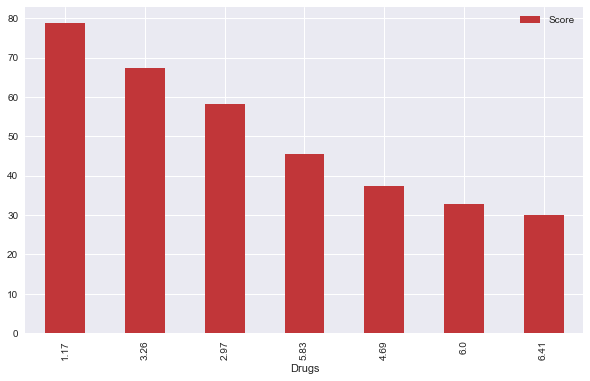

In [20]:
df.plot(x='Drugs', y='Score', kind='bar');

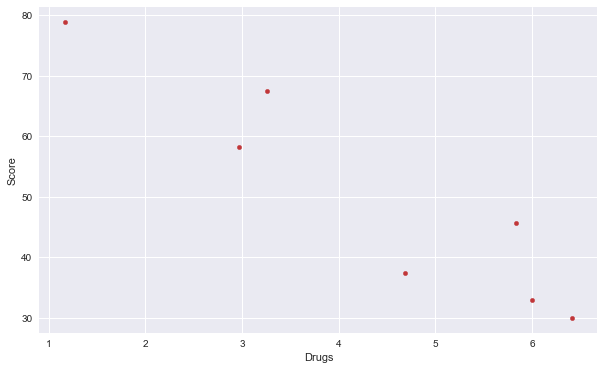

In [21]:
df.plot(x='Drugs', y='Score', kind='scatter');

**Видна тенденция...**

In [22]:
df.corr(method='pearson')

,Drugs,Score
Drugs,1.000000,-0.936928
Score,-0.936928,1.000000


Не советуем строить регрессию по 7 наблюдениям :)

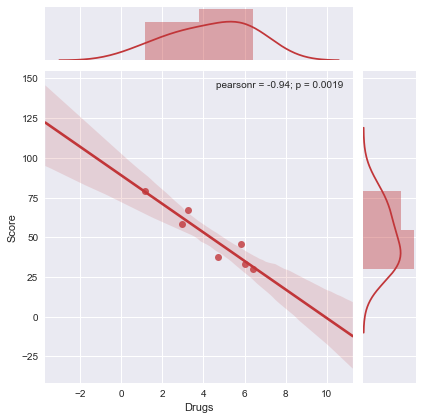

In [23]:
sns.jointplot(x='Drugs', y='Score', 
              data=df, kind='reg');

## Ссылки:
- [Тьюториалы](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html) из документации Seaborn
- [Статья](https://habrahabr.ru/post/266289/) на Хабрахабре "Работа с данными среднего размера в Python. Pandas и Seaborn" (Александр Кукушкин)